#### Import necessary Libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Load Dataset

In [2]:
school_data = pd.read_csv("cleaned_transformed_dataset.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
school_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Curricular Units 1st Semester,Total Curricular Units 2nd Semester,Total Credits Earned,Total Units Enrolled,Weighted Grade 1st Semester,Weighted Grade 2nd Semester,GPA
0,0,7,0.555556,1,1,0,0.351853,0,12,9,5,9,0.431185,1,0,0,1,1,0,0.056604,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0,5,0.111111,10,1,0,0.847053,0,0,2,3,3,0.634096,1,0,0,0,1,0,0.037736,0,0.0,0.230769,0.133333,0.230769,0.740741,0.0,0.0,0.26087,0.181818,0.30,0.736559,0.0,0.732558,0.111111,0.640687,2,0.230769,0.26087,0.0,0.491639,0.0,0.0,0.0
2,0,0,0.555556,4,1,0,0.351853,0,21,26,9,9,0.397812,1,0,0,0,1,0,0.037736,0,0.0,0.230769,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0.230769,0.26087,0.0,0.491639,0.0,0.0,0.0
3,0,7,0.222222,14,1,0,0.351853,0,22,26,5,3,0.328395,1,0,0,1,0,0,0.056604,0,0.0,0.230769,0.177778,0.230769,0.708995,0.0,0.0,0.26087,0.303030,0.25,0.666667,0.0,0.209302,0.000000,0.124174,2,0.230769,0.26087,0.0,0.491639,0.0,0.0,0.0
4,1,11,0.111111,2,0,0,0.065158,0,21,27,9,9,0.620746,0,0,0,1,0,0,0.528302,0,0.0,0.230769,0.200000,0.192308,0.650794,0.0,0.0,0.26087,0.181818,0.30,0.698925,0.0,0.732558,0.111111,0.640687,2,0.230769,0.26087,0.0,0.491639,0.0,0.0,0.0


#### Polynomial features

In [5]:
numerical_variables = ["Application order","Previous qualification (grade)","Admission grade",
    "Age at enrollment","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP",'Total Curricular Units 1st Semester',
    'Total Curricular Units 2nd Semester', 'Total Credits Earned', 'Total Units Enrolled', 'Weighted Grade 1st Semester',
     'Weighted Grade 2nd Semester', 'GPA'
]

In [6]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(school_data[numerical_variables])

In [7]:
# Convert the NumPy array to a DataFrame for easier viewing
poly_feature_names = poly.get_feature_names_out(numerical_variables)
poly_df = pd.DataFrame(poly_features, columns = poly_feature_names)

In [8]:
poly_df.head()

,1,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Total Curricular Units 1st Semester,Total Curricular Units 2nd Semester,Total Credits Earned,Total Units Enrolled,Weighted Grade 1st Semester,Weighted Grade 2nd Semester,GPA,Application order Previous qualification (grade),Application order Admission grade,Application order Age at enrollment,Application order Curricular units 1st sem (credited),Application order Curricular units 1st sem (enrolled),Application order Curricular units 1st sem (evaluations),Application order Curricular units 1st sem (approved),Application order Curricular units 1st sem (grade),Application order Curricular units 1st sem (without evaluations),Application order Curricular units 2nd sem (credited),Application order Curricular units 2nd sem (enrolled),Application order Curricular units 2nd sem (evaluations),Application order Curricular units 2nd sem (approved),Application order Curricular units 2nd sem (grade),Application order Curricular units 2nd sem (without evaluations),Application order Unemployment rate,Application order Inflation rate,Application order GDP,Application order Total Curricular Units 1st Semester,Application order Total Curricular Units 2nd Semester,Application order Total Credits Earned,Application order Total Units Enrolled,Application order Weighted Grade 1st Semester,Application order Weighted Grade 2nd Semester,Application order GPA,Previous qualification (grade) Admission grade,Previous qualification (grade) Age at enrollment,Previous qualification (grade) Curricular units 1st sem (credited),Previous qualification (grade) Curricular units 1st sem (enrolled),Previous qualification (grade) Curricular units 1st sem (evaluations),Previous qualification (grade) Curricular units 1st sem (approved),Previous qualification (grade) Curricular units 1st sem (grade),Previous qualification (grade) Curricular units 1st sem (without evaluations),Previous qualification (grade) Curricular units 2nd sem (credited),Previous qualification (grade) Curricular units 2nd sem (enrolled),Previous qualification (grade) Curricular units 2nd sem (evaluations),Previous qualification (grade) Curricular units 2nd sem (approved),Previous qualification (grade) Curricular units 2nd sem (grade),Previous qualification (grade) Curricular units 2nd sem (without evaluations),Previous qualification (grade) Unemployment rate,Previous qualification (grade) Inflation rate,Previous qualification (grade) GDP,Previous qualification (grade) Total Curricular Units 1st Semester,Previous qualification (grade) Total Curricular Units 2nd Semester,Previous qualification (grade) Total Credits Earned,Previous qualification (grade) Total Units Enrolled,Previous qualification (grade) Weighted Grade 1st Semester,Previous qualification (grade) Weighted Grade 2nd Semester,Previous qualification (grade) GPA,Admission grade Age at enrollment,Admission grade Curricular units 1st sem (credited),Admission grade Curricular units 1st sem (enrolled),Admission grade Curricular units 1st sem (evaluations),Admission grade Curricular units 1st sem (approved),Admission grade Curricular units 1st sem (grade),Admission grade Curricular units 1st sem (without evaluations),Admission grade Curricular units 2nd sem (credited),Admission grade Curricular units 2nd sem (enrolled),Admission grade Curricular units 2nd sem (evaluations),Admission grade Curricular units 2nd sem (approved),Admission grade Curricular units 2nd sem (grade),Admission

#### Feature Transformation

##### - Log transformation to skewed numerical features

In [9]:
# Calculate skewness for each numerical variable
skewness = school_data[numerical_variables].skew()

# Define a threshold for high skewness
threshold = 1 

# Create a list of highly skewed numerical variables
high_skewed_variables = skewness[abs(skewness) > threshold].index.tolist()

# Display the highly skewed numerical variables
print("Highly skewed numerical variables:")
print(high_skewed_variables)


Highly skewed numerical variables:
['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Total Curricular Units 1st Semester', 'Total Curricular Units 2nd Semester', 'Total Credits Earned', 'Total Units Enrolled', 'Weighted Grade 1st Semester', 'Weighted Grade 2nd Semester', 'GPA']


In [10]:
skewed_numerical_variables = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                              'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
                              'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Total Curricular Units 1st Semester', 
                              'Total Curricular Units 2nd Semester', 'Total Credits Earned', 'Total Units Enrolled', 'Weighted Grade 1st Semester', 
                              'Weighted Grade 2nd Semester', 'GPA']

In [11]:
# Apply log transformation
for col in skewed_numerical_variables:
    # Add a small constant to avoid log(0)
    school_data[col] = np.log1p(school_data[col])

In [12]:
school_data[skewed_numerical_variables].head()

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Total Curricular Units 1st Semester,Total Curricular Units 2nd Semester,Total Credits Earned,Total Units Enrolled,Weighted Grade 1st Semester,Weighted Grade 2nd Semester,GPA
0,0.441833,0.055060,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.105361,0.037041,0.0,0.207639,0.554311,0.0,0.0,0.551906,0.0,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
2,0.441833,0.037041,0.0,0.207639,0.000000,0.0,0.0,0.000000,0.0,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
3,0.200671,0.055060,0.0,0.207639,0.535905,0.0,0.0,0.510826,0.0,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
4,0.105361,0.424157,0.0,0.207639,0.501256,0.0,0.0,0.529996,0.0,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0


#### Feature Selection

##### - Filter method

In [13]:
corr_matrix = school_data.corr()

In [14]:
target_corr = corr_matrix['Target']
selected_features = target_corr[abs(target_corr) >= 0.47].index.tolist()
selected_features.remove('Target')  # Remove the target variable from the list

print("Selected Features:", selected_features)


Selected Features: ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


##### - chi-square test method

In [15]:
# Specify target variable
target = 'Target'
X = school_data.drop(columns=[target])  # Features
y = school_data[target]  # Target variable

In [16]:
# Perform Chi-Square test
chi2_values, p_values = chi2(X, y)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_values,
    'p-value': p_values
})

# Sort the results by Chi-Square statistic
chi2_results = chi2_results.sort_values(by='Chi2 Stat', ascending=False)

In [17]:
# Set the significance level
alpha = 0.05

# Get features that are statistically significant
significant_features = chi2_results[chi2_results['p-value'] < alpha]

print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                                           Feature   Chi2 Stat        p-value
1                                 Application mode  950.996305  3.117282e-207
5                           Previous qualification  397.102336   5.892824e-87
18                              Scholarship holder  308.105936   1.246368e-67
15                                          Debtor  229.847548   1.228115e-50
30             Curricular units 2nd sem (approved)  176.526327   4.653666e-39
8                           Mother's qualification  161.025809   1.080662e-35
31                Curricular units 2nd sem (grade)  156.588804   9.935123e-35
17                                          Gender  151.222452   1.453656e-33
11                             Father's occupation  137.894496   1.139176e-30
16                         Tuition fees up to date   98.290199   4.534763e-22
24             Curricular units 1st sem (approved)   96.913572   9.025791e-22
25                Curric

##### - Wrapper method

In [18]:
X = school_data.drop(columns=['Target']) 
y = school_data['Target']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Initialize the model 
model = LogisticRegression(max_iter=200)

In [44]:
# Initialize RFE to select a specified number of features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_scaled, y)  # Fit RFE

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (approved)', 'Total Credits Earned',
       'Total Units Enrolled'],
      dtype='object')


##### - Embedded Method

In [34]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)


Lasso(alpha=0.1)

In [35]:
# Get feature importance
importance = pd.Series(lasso.coef_, index=X.columns)
important_features = importance[importance != 0]
print("Selected Features from Lasso:\n", important_features)

Selected Features from Lasso:
 Application mode                         -0.004747
Tuition fees up to date                   0.117101
Scholarship holder                        0.044333
Age at enrollment                        -0.017607
Curricular units 1st sem (evaluations)   -0.016505
Curricular units 2nd sem (approved)       0.423012
Curricular units 2nd sem (grade)          0.062946
Total Curricular Units 2nd Semester      -0.080228
dtype: float64


##### - Stability selection

In [36]:
def stability_selection(X, y, n_bootstrap=100, threshold=0.5, alpha=0.01):
    """
    Perform stability selection using Lasso (L1-regularization).
    
    Parameters:
    - X: Feature matrix
    - y: Target vector
    - n_bootstrap: Number of bootstrap iterations
    - threshold: Proportion of times a feature must be selected to be considered stable
    - alpha: Regularization strength for Lasso
    
    Returns:
    - Selected features (boolean mask)
    """
    n_samples, n_features = X.shape
    selected_counts = np.zeros(n_features)  # Track how many times each feature is selected
    
    for _ in range(n_bootstrap):
        # Resample the dataset
        X_resampled, y_resampled = resample(X, y, random_state=None)
        
        # Fit Lasso model to the resampled data
        lasso = Lasso(alpha=alpha, random_state=None, max_iter=10000)
        lasso.fit(X_resampled, y_resampled)
        
        # Check which features were selected (non-zero coefficients)
        selected = np.abs(lasso.coef_) > 1e-5
        selected_counts += selected
    
    # Features selected in more than `threshold` proportion of bootstraps
    stable_features = selected_counts / n_bootstrap > threshold
    
    return stable_features

In [37]:
# Perform stability selection
stable_features = stability_selection(X_scaled, y, n_bootstrap=100, threshold=0.5, alpha=0.01)

# Display selected features
selected_feature_names = X.columns[stable_features]
print("Selected features by stability selection:")
print(selected_feature_names)

Selected features by stability selection:
Index(['Application mode', 'Course', 'Previous qualification',
       'Mother's occupation', 'Admission grade', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate'],
      dtype='object')


#### Dimensionality Reduction

##### - Principal Component Analysis (PCA)

In [49]:
# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

# Convert PCA result back to DataFrame
df_pca = pd.DataFrame(df_pca)

# Display the first few rows of the transformed data
df_pca.head()


,0,1
0,-6.195838,2.231201
1,-0.742960,-0.867350
2,-3.015414,1.844086
3,-0.364809,-1.392366
4,-0.035141,1.894721


In [50]:
print(X_scaled.shape)
print(df_pca.shape)

(4424, 43)
(4424, 2)


Explained variance by each principal component:
[0.26607465 0.0924747 ]


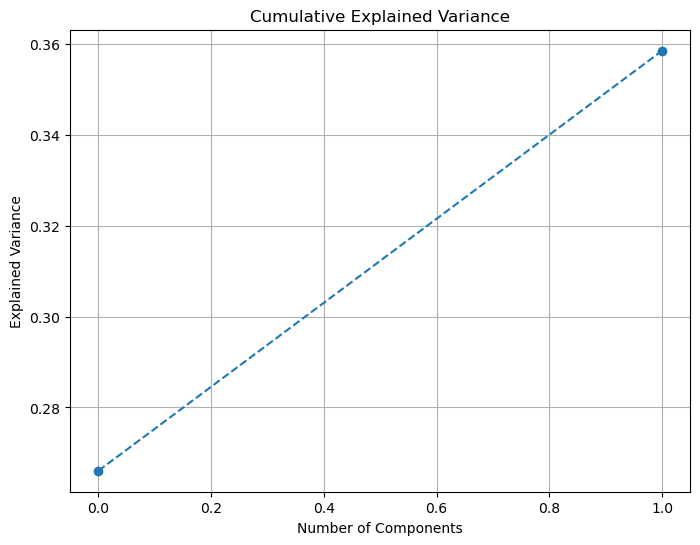

In [51]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance
print("Explained variance by each principal component:")
print(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

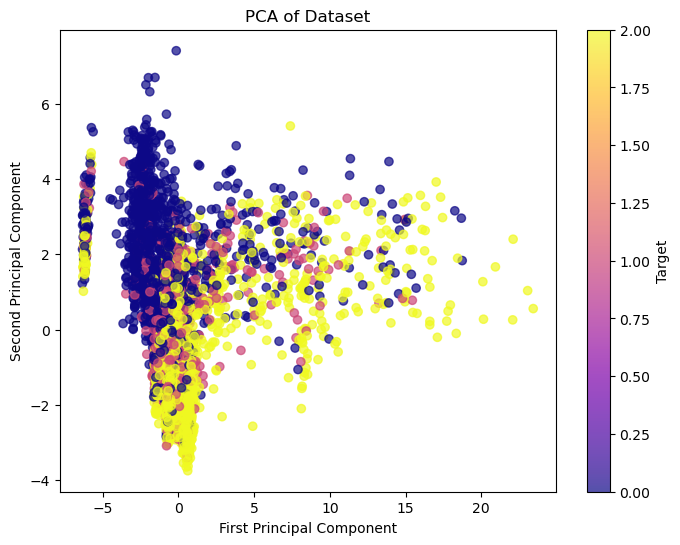

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], c=school_data['Target'], cmap='plasma', alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Target')
plt.savefig('PCA.png', dpi=300)
plt.show()

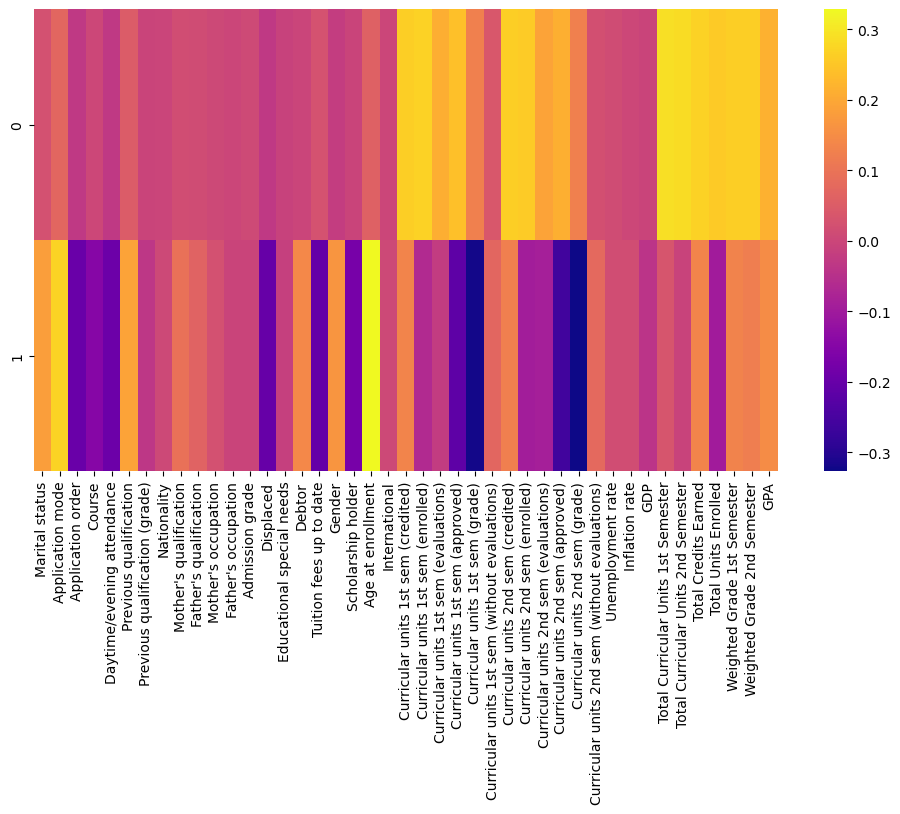

In [63]:
school_comp = pd.DataFrame(pca.components_, columns = X.columns)
plt.figure(figsize=(12,6))
sns.heatmap(school_comp, cmap = "plasma")
plt.savefig('PCA Heatmap.png', dpi=300)
plt.show()

##### - t-SNE

In [65]:
# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
df_tsne_2d = tsne.fit_transform(X_scaled)

# Convert the result to DataFrame for easier plotting
df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=['Component 1', 'Component 2'])

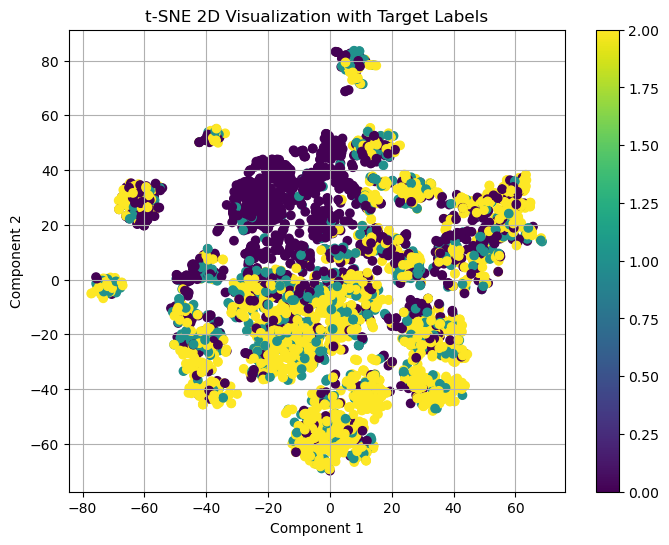

In [72]:
# Plot t-SNE result with target labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_tsne_2d['Component 1'], df_tsne_2d['Component 2'], 
                      c=school_data['Target'], cmap='viridis', marker='o')

# Adding a color bar for better interpretation
plt.colorbar(scatter)
plt.title('t-SNE 2D Visualization with Target Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.savefig('tsne.png', dpi=300)
plt.show()

In [73]:
school_data.to_csv('updated_dataset.csv', index=False)